# Assignment-4

This notebook contains the coding questions to test the proficiency in `Object Oriented Programming` in python.

### Date: 16th May, 2025

### Steps to solve and upload the assignment 

- Download the notebook in your local machine.
- Solve the questions in the notebook and save it.
- Rename the file as `Assignment-04-<your_name>_<your_surname>.ipynb`. For example if your name is Dipika Chopra then name the file as `Assignment-04-Dipika_Chopra.ipynb`.
- Upload the solved notebook in the google drive location: https://drive.google.com/drive/folders/14z3q91F8xzPb8Hm-KxNGn-nkKacqB17v?usp=drive_link
<h3><span style="color:red"> Deadline: 31st May, 2025 </span></h3>

## Problem-1

Design a system for a library. Include classes for `Book`, `Patron`, and `Library`.

- The `Book` class should have attributes for title, author, ISBN, and a method `is_available()` that returns `True` if the book is not currently checked out and `False` otherwise. It should also have a method `check_out()` that marks the book as checked out and a method `check_in()` that marks it as available.
- The `Patron` class should have attributes for name and patron ID and a method `borrow_book(book)` that associates a book with the patron.
- The `Library` class should have a collection of `Book` objects and `Patron` objects. It should have methods to `add_book(book)`, `add_patron(patron)`, `lend_book(book, patron)`, and `return_book(book)`. The `lend_book` method should only allow a book to be lent if it's available and the patron exists in the library.


Test your implementation.

In [ ]:
### Implementation of Book class

class Book:
    def __init__(self, title, author, isbn):
        self.title = title
        self.author = author
        self.isbn = isbn
        self._is_checked_out = False  # Internal attribute to track availability

    def is_available(self):
        """Returns True if the book is available, False otherwise."""
        return not self._is_checked_out

    def check_out(self):
        """Marks the book as checked out."""
        if self.is_available():
            self._is_checked_out = True
            print(f"'{self.title}' has been checked out.")
        else:
            print(f"'{self.title}' is already checked out.")

    def check_in(self):
        """Marks the book as available."""
        if not self.is_available():
            self._is_checked_out = False
            print(f"'{self.title}' has been checked in.")
        else:
            print(f"'{self.title}' is already available.")

    def __str__(self):
        return f"'{self.title}' by {self.author} (ISBN: {self.isbn})"

In [ ]:
### Implementation of Patron class

class Patron:
    def __init__(self, name, patron_id):
        self.name = name
        self.patron_id = patron_id
        self.borrowed_books = []  # List to store books borrowed by the patron

    def borrow_book(self, book):
        """Associates a book with the patron."""
        if book.is_available():
            self.borrowed_books.append(book)
            print(f"{self.name} has borrowed '{book.title}'.")
            return True
        else:
            print(f"Cannot borrow '{book.title}': It's not available.")
            return False

    def return_book(self, book):
        """Removes a book association from the patron."""
        if book in self.borrowed_books:
            self.borrowed_books.remove(book)
            print(f"{self.name} has returned '{book.title}'.")
            return True
        else:
            print(f"{self.name} did not borrow '{book.title}'.")
            return False

    def __str__(self):
        return f"Patron: {self.name} (ID: {self.patron_id})"

In [ ]:
### Implementation of Library Class

class Library:
    def __init__(self, name="Public Library"):
        self.name = name
        self.books = {}  # Dictionary to store books, keyed by ISBN
        self.patrons = {}  # Dictionary to store patrons, keyed by patron ID

    def add_book(self, book):
        """Adds a book to the library's collection."""
        if book.isbn not in self.books:
            self.books[book.isbn] = book
            print(f"Added '{book.title}' to the library.")
        else:
            print(f"Book with ISBN {book.isbn} already exists in the library.")

    def add_patron(self, patron):
        """Adds a patron to the library's system."""
        if patron.patron_id not in self.patrons:
            self.patrons[patron.patron_id] = patron
            print(f"Added patron '{patron.name}' to the library.")
        else:
            print(f"Patron with ID {patron.patron_id} already exists in the library.")

    def lend_book(self, book_isbn, patron_id):
        """
        Lends a book to a patron.
        Only allows lending if the book is available and the patron exists.
        """
        book = self.books.get(book_isbn)
        patron = self.patrons.get(patron_id)

        if not book:
            print(f"Error: Book with ISBN {book_isbn} not found.")
            return
        if not patron:
            print(f"Error: Patron with ID {patron_id} not found.")
            return

        if book.is_available():
            book.check_out()
            patron.borrow_book(book)
            print(f"Successfully lent '{book.title}' to {patron.name}.")
        else:
            print(f"Failed to lend '{book.title}': It is not available.")

    def return_book(self, book_isbn, patron_id):
        """
        Handles the return of a book.
        Marks the book as available and updates the patron's borrowed books.
        """
        book = self.books.get(book_isbn)
        patron = self.patrons.get(patron_id)

        if not book:
            print(f"Error: Book with ISBN {book_isbn} not found.")
            return
        if not patron:
            print(f"Error: Patron with ID {patron_id} not found.")
            return

        if patron.return_book(book):
            book.check_in()
            print(f"Successfully returned '{book.title}' from {patron.name}.")
        else:
            print(f"Failed to return '{book.title}' for {patron.name}.")

    def list_all_books(self):
        """Lists all books in the library."""
        print("\n--- All Books in Library ---")
        if not self.books:
            print("No books in the library.")
            return
        for isbn, book in self.books.items():
            status = "Available" if book.is_available() else "Checked Out"
            print(f"{book} - Status: {status}")

    def list_all_patrons(self):
        """Lists all patrons in the library."""
        print("\n--- All Patrons in Library ---")
        if not self.patrons:
            print("No patrons registered.")
            return
        for p_id, patron in self.patrons.items():
            print(patron)
            if patron.borrowed_books:
                print("  Borrowed Books:")
                for book in patron.borrowed_books:
                    print(f"    - {book.title}")
            else:
                print("  No books currently borrowed.")

In [4]:
# Create a library
my_library = Library("Bengaluru Central Library")

# Create some books
book1 = Book("The God of Small Things", "Arundhati Roy", "978-0679727521")
book2 = Book("A Suitable Boy", "Vikram Seth", "978-0060975612")
book3 = Book("Ignited Minds", "A.P.J. Abdul Kalam", "978-8179929211")
book4 = Book("The Palace of Illusions", "Chitra Banerjee Divakaruni", "978-1439121921")
book5 = Book("Midnight's Children", "Salman Rushdie", "978-0812976527")

In [5]:
# Add books to the library
my_library.add_book(book1)
my_library.add_book(book2)
my_library.add_book(book3)
my_library.add_book(book4)
my_library.add_book(book5)
my_library.add_book(book1) # Trying to add duplicate

Added 'The God of Small Things' to the library.
Added 'A Suitable Boy' to the library.
Added 'Ignited Minds' to the library.
Added 'The Palace of Illusions' to the library.
Added 'Midnight's Children' to the library.
Book with ISBN 978-0679727521 already exists in the library.


In [7]:
# Create some patrons
patron1 = Patron("Rohan Sharma", "P001")
patron2 = Patron("Priya Singh", "P002")
patron3 = Patron("Amit Kumar", "P003")


# Add patrons to the library
my_library.add_patron(patron1)
my_library.add_patron(patron2)
my_library.add_patron(patron3)
my_library.add_patron(patron1) # Trying to add duplicate

Added patron 'Rohan Sharma' to the library.
Added patron 'Priya Singh' to the library.
Added patron 'Amit Kumar' to the library.
Patron with ID P001 already exists in the library.


In [8]:
# List initial state of books and patrons
my_library.list_all_books()
my_library.list_all_patrons()


--- All Books in Library ---
'The God of Small Things' by Arundhati Roy (ISBN: 978-0679727521) - Status: Available
'A Suitable Boy' by Vikram Seth (ISBN: 978-0060975612) - Status: Available
'Ignited Minds' by A.P.J. Abdul Kalam (ISBN: 978-8179929211) - Status: Available
'The Palace of Illusions' by Chitra Banerjee Divakaruni (ISBN: 978-1439121921) - Status: Available
'Midnight's Children' by Salman Rushdie (ISBN: 978-0812976527) - Status: Available

--- All Patrons in Library ---
Patron: Rohan Sharma (ID: P001)
  No books currently borrowed.
Patron: Priya Singh (ID: P002)
  No books currently borrowed.
Patron: Amit Kumar (ID: P003)
  No books currently borrowed.


In [9]:
print("\n--- Lending Books ---")
my_library.lend_book(book1.isbn, patron1.patron_id) # Rohan borrows 'The God of Small Things'
my_library.lend_book(book3.isbn, patron2.patron_id) # Priya borrows 'Ignited Minds'
my_library.lend_book(book5.isbn, patron1.patron_id) # Rohan borrows 'Midnight's Children'
my_library.lend_book(book1.isbn, patron3.patron_id) # Amit tries to borrow 'The God of Small Things' (already lent)
my_library.lend_book("INVALID_ISBN", patron1.patron_id) # Invalid book
my_library.lend_book(book2.isbn, "INVALID_PATRON") # Invalid patron


--- Lending Books ---
'The God of Small Things' has been checked out.
Cannot borrow 'The God of Small Things': It's not available.
Successfully lent 'The God of Small Things' to Rohan Sharma.
'Ignited Minds' has been checked out.
Cannot borrow 'Ignited Minds': It's not available.
Successfully lent 'Ignited Minds' to Priya Singh.
'Midnight's Children' has been checked out.
Cannot borrow 'Midnight's Children': It's not available.
Successfully lent 'Midnight's Children' to Rohan Sharma.
Failed to lend 'The God of Small Things': It is not available.
Error: Book with ISBN INVALID_ISBN not found.
Error: Patron with ID INVALID_PATRON not found.


In [10]:
# List state after lending
my_library.list_all_books()
my_library.list_all_patrons()


--- All Books in Library ---
'The God of Small Things' by Arundhati Roy (ISBN: 978-0679727521) - Status: Checked Out
'A Suitable Boy' by Vikram Seth (ISBN: 978-0060975612) - Status: Available
'Ignited Minds' by A.P.J. Abdul Kalam (ISBN: 978-8179929211) - Status: Checked Out
'The Palace of Illusions' by Chitra Banerjee Divakaruni (ISBN: 978-1439121921) - Status: Available
'Midnight's Children' by Salman Rushdie (ISBN: 978-0812976527) - Status: Checked Out

--- All Patrons in Library ---
Patron: Rohan Sharma (ID: P001)
  No books currently borrowed.
Patron: Priya Singh (ID: P002)
  No books currently borrowed.
Patron: Amit Kumar (ID: P003)
  No books currently borrowed.


In [11]:
print("\n--- Returning Books ---")
my_library.return_book(book1.isbn, patron1.patron_id) # Rohan returns 'The God of Small Things'
my_library.return_book(book3.isbn, patron1.patron_id) # Rohan tries to return 'Ignited Minds' (not borrowed by him)
my_library.return_book(book4.isbn, patron2.patron_id) # Priya tries to return 'The Palace of Illusions' (not borrowed by her)


--- Returning Books ---
Rohan Sharma did not borrow 'The God of Small Things'.
Failed to return 'The God of Small Things' for Rohan Sharma.
Rohan Sharma did not borrow 'Ignited Minds'.
Failed to return 'Ignited Minds' for Rohan Sharma.
Priya Singh did not borrow 'The Palace of Illusions'.
Failed to return 'The Palace of Illusions' for Priya Singh.


In [12]:
# List final state after returns
my_library.list_all_books()
my_library.list_all_patrons()


--- All Books in Library ---
'The God of Small Things' by Arundhati Roy (ISBN: 978-0679727521) - Status: Checked Out
'A Suitable Boy' by Vikram Seth (ISBN: 978-0060975612) - Status: Available
'Ignited Minds' by A.P.J. Abdul Kalam (ISBN: 978-8179929211) - Status: Checked Out
'The Palace of Illusions' by Chitra Banerjee Divakaruni (ISBN: 978-1439121921) - Status: Available
'Midnight's Children' by Salman Rushdie (ISBN: 978-0812976527) - Status: Checked Out

--- All Patrons in Library ---
Patron: Rohan Sharma (ID: P001)
  No books currently borrowed.
Patron: Priya Singh (ID: P002)
  No books currently borrowed.
Patron: Amit Kumar (ID: P003)
  No books currently borrowed.


In [13]:
print("\n--- Additional Scenarios ---")
# Check availability of a book
print(f"Is '{book2.title}' available? {book2.is_available()}")
my_library.lend_book(book2.isbn, patron3.patron_id)
print(f"Is '{book2.title}' available? {book2.is_available()}")


--- Additional Scenarios ---
Is 'A Suitable Boy' available? True
'A Suitable Boy' has been checked out.
Cannot borrow 'A Suitable Boy': It's not available.
Successfully lent 'A Suitable Boy' to Amit Kumar.
Is 'A Suitable Boy' available? False


In [14]:
# Try to check in an already available book
book_available = Book("New Available Book", "New Author", "AVAIL-001")
my_library.add_book(book_available)
book_available.check_in()

Added 'New Available Book' to the library.
'New Available Book' is already available.


## Problem-2

Create an base class `Shape` with an method `area()` and another method `perimeter()`. Then, create classes `Rectangle` and `Circle` that inherit from `Shape` and implement the `area()` method. The `perimeter()` method in `Shape` should raise a `NotImplementedError`. Implement the `perimeter()` method in `Rectangle` and `Circle`.

Test your implementation.

In [15]:
import math

### Base Class Shape

class Shape:
    """
    Base class for geometric shapes.
    Defines common methods for area and perimeter.
    """
    def area(self):
        """
        Calculates and returns the area of the shape.
        This method must be implemented by subclasses.
        """
        raise NotImplementedError("Subclasses must implement the 'area()' method.")

    def perimeter(self):
        """
        Calculates and returns the perimeter of the shape.
        This method must be implemented by subclasses.
        """
        raise NotImplementedError("Subclasses must implement the 'perimeter()' method.")

### Rectangle class inheriting Base class Shape

class Rectangle(Shape):
    """
    Represents a rectangle, inheriting from Shape.
    """
    def __init__(self, width, height):
        if width <= 0 or height <= 0:
            raise ValueError("Width and height must be positive values.")
        self.width = width
        self.height = height

    def area(self):
        """
        Calculates the area of the rectangle.
        Area = width * height
        """
        return self.width * self.height

    def perimeter(self):
        """
        Calculates the perimeter of the rectangle.
        Perimeter = 2 * (width + height)
        """
        return 2 * (self.width + self.height)

    def __str__(self):
        return f"Rectangle(width={self.width}, height={self.height})"

### Circle class inheriting Base class Shape

class Circle(Shape):
    """
    Represents a circle, inheriting from Shape.
    """
    def __init__(self, radius):
        if radius <= 0:
            raise ValueError("Radius must be a positive value.")
        self.radius = radius

    def area(self):
        """
        Calculates the area of the circle.
        Area = pi * radius^2
        """
        return math.pi * (self.radius ** 2)

    def perimeter(self):
        """
        Calculates the perimeter (circumference) of the circle.
        Perimeter = 2 * pi * radius
        """
        return 2 * math.pi * self.radius

    def __str__(self):
        return f"Circle(radius={self.radius})"

In [17]:
### Testing Shape Base Class

try:
    s = Shape()
    s.area()
except NotImplementedError as e:
    print(f"Caught expected error for Shape.area(): {e}")


try:
    s = Shape()
    s.perimeter()
except NotImplementedError as e:
    print(f"Caught expected error for Shape.perimeter(): {e}")

Caught expected error for Shape.area(): Subclasses must implement the 'area()' method.
Caught expected error for Shape.perimeter(): Subclasses must implement the 'perimeter()' method.


In [ ]:
### Testing Rectangle Class

try:
    rect = Rectangle(10, 5)
    print(rect)
    print(f"Area of rectangle: {rect.area()}")
    print(f"Perimeter of rectangle: {rect.perimeter()}")

    # Test with invalid dimensions
    invalid_rect = Rectangle(-2, 5)
except ValueError as e:
    print(f"Caught expected error for invalid Rectangle: {e}")

Rectangle(width=10, height=5)
Area of rectangle: 50
Perimeter of rectangle: 30
Caught expected error for invalid Rectangle: Width and height must be positive values.


In [19]:
### Testing Circle Class

try:
    circle = Circle(7)
    print(circle)
    print(f"Area of circle: {circle.area():.2f}") # Format for readability
    print(f"Perimeter of circle: {circle.perimeter():.2f}")

    # Test with invalid radius
    invalid_circle = Circle(0)
except ValueError as e:
    print(f"Caught expected error for invalid Circle: {e}")

Circle(radius=7)
Area of circle: 153.94
Perimeter of circle: 43.98
Caught expected error for invalid Circle: Radius must be a positive value.


## Problem-3

Design a system to model different types of employees in a company. There should be a base `Employee` class with attributes for `name` and `employee_id`. Create two subclasses: `SalariedEmployee` with an attribute for `monthly_salary` and a method `calculate_paycheck()` that returns the monthly salary, and `HourlyEmployee` with attributes for `hourly_rate` and `hours_worked`, and a `calculate_paycheck()` method that returns the total pay for the week. Demonstrate creating instances of both employee types and calling their `calculate_paycheck()` methods.

Test your implementation.

In [20]:
# Base Employee class

class Employee:
    """
    Base class for all employees in the company.
    """
    def __init__(self, name, employee_id):
        if not isinstance(name, str) or not name.strip():
            raise ValueError("Employee name cannot be empty.")
        if not isinstance(employee_id, str) or not employee_id.strip():
            raise ValueError("Employee ID cannot be empty.")

        self.name = name
        self.employee_id = employee_id

    def calculate_paycheck(self):
        """
        Abstract method to be implemented by subclasses.
        Returns the calculated pay for the employee.
        """
        raise NotImplementedError("Subclasses must implement 'calculate_paycheck()' method.")

    def __str__(self):
        return f"Employee Name: {self.name}, ID: {self.employee_id}"


# SalariedEmployee class derived from Base Employee class

class SalariedEmployee(Employee):
    """
    Represents an employee who receives a fixed monthly salary.
    Inherits from the Employee base class.
    """
    def __init__(self, name, employee_id, monthly_salary):
        super().__init__(name, employee_id) # Call the base class constructor
        if not isinstance(monthly_salary, (int, float)) or monthly_salary < 0:
            raise ValueError("Monthly salary must be a non-negative number.")
        self.monthly_salary = monthly_salary

    def calculate_paycheck(self):
        """
        Calculates and returns the monthly salary as the paycheck.
        """
        return self.monthly_salary

    def __str__(self):
        return (f"Salaried Employee: {self.name} (ID: {self.employee_id}), "
                f"Monthly Salary: ₹{self.monthly_salary:,.2f}")


# HourlyEmployee class derived from Base Employee class

class HourlyEmployee(Employee):
    """
    Represents an employee who is paid based on an hourly rate and hours worked.
    Inherits from the Employee base class.
    """
    def __init__(self, name, employee_id, hourly_rate, hours_worked):
        super().__init__(name, employee_id) # Call the base class constructor
        if not isinstance(hourly_rate, (int, float)) or hourly_rate < 0:
            raise ValueError("Hourly rate must be a non-negative number.")
        if not isinstance(hours_worked, (int, float)) or hours_worked < 0:
            raise ValueError("Hours worked must be a non-negative number.")

        self.hourly_rate = hourly_rate
        self.hours_worked = hours_worked

    def calculate_paycheck(self):
        """
        Calculates and returns the total pay for the week based on hourly rate and hours worked.
        """
        return self.hourly_rate * self.hours_worked

    def __str__(self):
        return (f"Hourly Employee: {self.name} (ID: {self.employee_id}), "
                f"Rate: ₹{self.hourly_rate:,.2f}/hr, Hours Worked: {self.hours_worked} hrs")


In [21]:
# Create Salaried Employees
try:
    salaried_emp1 = SalariedEmployee("Ravi Kumar", "SE001", 60000.00)
    print(salaried_emp1)
    print(f"Paycheck for {salaried_emp1.name}: ₹{salaried_emp1.calculate_paycheck():,.2f}")

    salaried_emp2 = SalariedEmployee("Priya Sharma", "SE002", 75500.50)
    print(salaried_emp2)
    print(f"Paycheck for {salaried_emp2.name}: ₹{salaried_emp2.calculate_paycheck():,.2f}")
except ValueError as e:
    print(f"Error creating Salaried Employee: {e}")

Salaried Employee: Ravi Kumar (ID: SE001), Monthly Salary: ₹60,000.00
Paycheck for Ravi Kumar: ₹60,000.00
Salaried Employee: Priya Sharma (ID: SE002), Monthly Salary: ₹75,500.50
Paycheck for Priya Sharma: ₹75,500.50


In [22]:
# Create Hourly Employees
try:
    hourly_emp1 = HourlyEmployee("Amit Singh", "HE001", 300.00, 40)
    print(hourly_emp1)
    print(f"Paycheck for {hourly_emp1.name}: ₹{hourly_emp1.calculate_paycheck():,.2f}")

    hourly_emp2 = HourlyEmployee("Neha Gupta", "HE002", 250.50, 35.5)
    print(hourly_emp2)
    print(f"Paycheck for {hourly_emp2.name}: ₹{hourly_emp2.calculate_paycheck():,.2f}")
except ValueError as e:
    print(f"Error creating Hourly Employee: {e}")

Hourly Employee: Amit Singh (ID: HE001), Rate: ₹300.00/hr, Hours Worked: 40 hrs
Paycheck for Amit Singh: ₹12,000.00
Hourly Employee: Neha Gupta (ID: HE002), Rate: ₹250.50/hr, Hours Worked: 35.5 hrs
Paycheck for Neha Gupta: ₹8,892.75


In [23]:
employees = []
try:
    employees.append(SalariedEmployee("Deepak Joshi", "SE003", 80000))
    employees.append(HourlyEmployee("Sonia Das", "HE003", 280, 42))
    employees.append(SalariedEmployee("Anjali Verma", "SE004", 55000))
    employees.append(HourlyEmployee("Gaurav Menon", "HE004", 320, 38.5))
except ValueError as e:
    print(f"Error adding employee to list: {e}")

# Process all employees in a list
for emp in employees:
    print(f"\nProcessing {emp.name} (ID: {emp.employee_id}):")
    print(f"  Type: {type(emp).__name__}")
    print(f"  Calculated Paycheck: ₹{emp.calculate_paycheck():,.2f}")


Processing Deepak Joshi (ID: SE003):
  Type: SalariedEmployee
  Calculated Paycheck: ₹80,000.00

Processing Sonia Das (ID: HE003):
  Type: HourlyEmployee
  Calculated Paycheck: ₹11,760.00

Processing Anjali Verma (ID: SE004):
  Type: SalariedEmployee
  Calculated Paycheck: ₹55,000.00

Processing Gaurav Menon (ID: HE004):
  Type: HourlyEmployee
  Calculated Paycheck: ₹12,320.00


## Problem-4

Design a class `polynomial` of one variable which will have attributes `degree`, a positive integer and `coefficients`, a list of floating point numbers. 
`degree` means the highest power of the variable and `coefficients` are the coefficient of individual terms.

A polynomial of degree `n` has `n+1` coefficients. 

- Example-1:
$$ 3x^4 + 5x^3 + x^2 + 9x + 10 $$
This is a polynomial of degree 4 and coefficients are [3, 5, 1, 9, 10].

- Example-2: (some coefficients could be zero)
$$ 0.7x^3 + 2.5x $$
Here the degree of polynomial is 3 and coefficients are [0.7, 0, 2.5, 0].

A polynomial of degree zero is just a constant value. 

In the `polynomial` class, you need to implement the following methods:
- `evaluate(x)` which will evaluate the polynomial for a given value of the variable x.
- `plot([x1, x2])` this will plot the polynomial for a given range of x1 to x2 of the variable.
- `derivative(x)` This will evaluate the derivative (differentiation) of the polynomial for a given value of the variable x.
- `plot_derivative([x1, x2])` this will plot the derivative of the polynomial for a given range of x1 to x2 of the variable.

The class should have basic checks, such that the number of coefficients provided by the user should be degree + 1 and the degree should be a positive integer. 

Test your implementation. 

In [44]:
import matplotlib.pyplot as plt
import numpy as np

def evaluate_polynomial(coefficients, value):
    """
    This functon evaluates a plynomial using Horner's method
    For more details: https://www.geeksforgeeks.org/horners-method-polynomial-evaluation/
    """
    result = coefficients[0]
    for i in range(1, len(coefficients)):
        result = result * value + coefficients[i]

    return result

def simple_plot(x_values, y_values, plt_title="My plot"):
    """
    This function plots y vs x. y_values are x_values are numpy arrays of 1D
    """
    plt.figure(figsize=(8,6))
    plt.plot(x_values, y_values)
    plt.title(plt_title, fontsize=16)
    plt.grid()
    plt.show()


class polynomial:
    """
    Polynomial class having attributes degree and coefficient and 
    implements methods like evaluate, plot, derivative, plot_derivative
    """

    def __init__(self, degree, coefficients):
        # Error handling
        if not isinstance(degree, int) or degree <= 0:
            raise ValueError("Degree of the polynomial must be a positive integer")
        if not isinstance(coefficients, list):
            raise ValueError("Coefficients must be provided in a list of numbers")
        for x in coefficients:
            if not isinstance(x, (int, float)):
                raise ValueError("Coefficients should be numbers")
        if len(coefficients) != degree+1:
            raise ValueError("Number of coefficients should be degree + 1")

        self.degree = degree
        self.coefficients = coefficients

        # degree and cefficients of the derivative of the polynomial
        self.der_degree = degree-1        
        self.der_coeff = [coeff*d for coeff,d in zip(self.coefficients, range(self.degree,0,-1))]

    def evaluate(self, x):
        """
        This method evaluates the of the plynomial for a given value x.
        """
        result = evaluate_polynomial(coefficients=self.coefficients, value=x)
        return result
    
    def derivative(self, x):
        """
        This method evaluates the derivative of the polynomial for a given value x.
        """
        result = evaluate_polynomial(coefficients=self.der_coeff, value=x)
        return result
    
    def plot(self, x_min, x_max):
        """
        This method's plots the ploynomial within the range x_min to x_max
        """
        x_values = np.linspace(x_min, x_max, 1000)
        y_values = np.array([self.evaluate(x) for x in x_values])
        simple_plot(x_values, y_values, plt_title="Graph of the Polynomial")

    def plot_derivative(self, x_min, x_max):
        """
        This method's plots the derivative of the ploynomial within the range x_min to x_max
        """
        x_values = np.linspace(x_min, x_max, 1000)
        y_values = np.array([self.derivative(x) for x in x_values])
        simple_plot(x_values, y_values, plt_title="Graph of the derivative of Polynomial")
        


In [45]:
# Define the polynimal: 3x^4 - 5x^3 + x^2 - 9x + 4

p = polynomial(4, [3, -5, 1, -9, 4])

# evaluate the polynomial at x = -2

p.evaluate(-2)

114

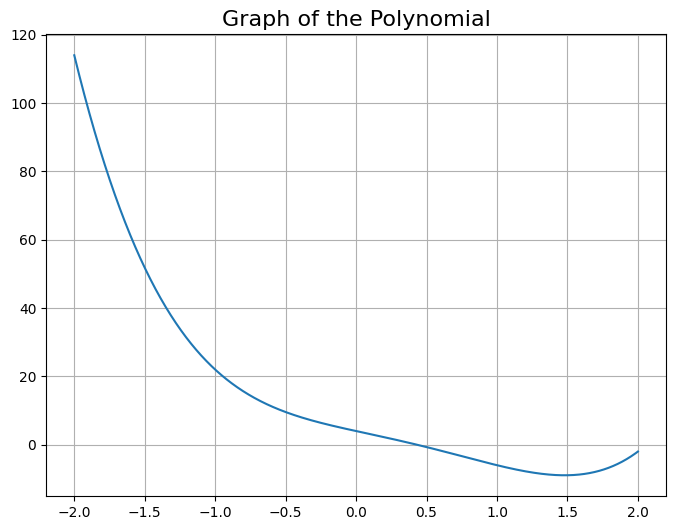

In [ ]:
# plot thee polynomial within the range of -2 to 2

p.plot(-2, 2)

In [ ]:
# evaluate the derivative at x = 1

p.derivative(1)

-10

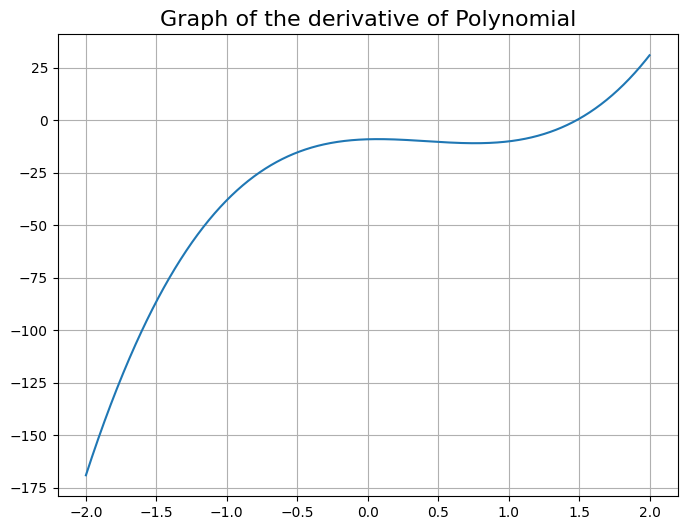

In [ ]:
# Plot the derivative

p.plot_derivative(-2, 2)

## Problem-5

Design a system to model a simple online shopping cart. Create a class `Product` with attributes for `name` and `price`. Then, create a `ShoppingCart` class that has a list to store `Product` objects. Implement methods to `add_item(product)`, `remove_item(product_name)`, and `calculate_total()`.

In [50]:
class Product:
    """
    Represents a product with a name and a price.
    """
    def __init__(self, name, price):
        if not isinstance(name, str) or not name.strip():
            raise ValueError("Product name cannot be empty.")
        if not isinstance(price, (int, float)) or price < 0:
            raise ValueError("Product price must be a non-negative number.")
        
        self.name = name.strip()
        self.price = float(price) # Ensure price is float for consistent calculations

    def __str__(self):
        return f"{self.name} (₹{self.price:,.2f})"

    def __repr__(self):
        # This helps when the object is in a list, showing how it could be reconstructed
        return f"Product('{self.name}', {self.price})"

    def __eq__(self, other):
        # Define equality based on name and price for easier comparison/removal
        if not isinstance(other, Product):
            return NotImplemented
        return self.name == other.name and self.price == other.price

    def __hash__(self):
        # Define hash for using Product objects in sets or as dictionary keys if needed
        return hash((self.name, self.price))


class ShoppingCart:
    """
    Represents a user's shopping cart, holding a collection of products.
    """
    def __init__(self):
        self.items = []  # List to store Product objects

    def add_item(self, product):
        """
        Adds a Product object to the shopping cart.

        Args:
            product (Product): The product to add.
        """
        if not isinstance(product, Product):
            raise TypeError("Only Product objects can be added to the cart.")
        self.items.append(product)
        print(f"Added '{product.name}' to the cart.")

    def remove_item(self, product_name):
        """
        Removes the first occurrence of a product with the given name from the cart.

        Args:
            product_name (str): The name of the product to remove.
        
        Returns:
            bool: True if the item was found and removed, False otherwise.
        """
        if not isinstance(product_name, str) or not product_name.strip():
            raise ValueError("Product name for removal cannot be empty.")
        
        product_name = product_name.strip()
        
        found = False
        for i, item in enumerate(self.items):
            if item.name.lower() == product_name.lower(): # Case-insensitive comparison
                del self.items[i]
                found = True
                print(f"Removed '{item.name}' from the cart.")
                break # Remove only the first instance found
        
        if not found:
            print(f"'{product_name}' not found in the cart.")
        return found

    def calculate_total(self):
        """
        Calculates the total price of all items currently in the cart.

        Returns:
            float: The sum of prices of all products in the cart.
        """
        total = sum(item.price for item in self.items)
        return total

    def view_cart(self):
        """
        Displays all items currently in the shopping cart.
        """
        print("\n--- Your Shopping Cart ---")
        if not self.items:
            print("Your cart is empty.")
        else:
            for i, item in enumerate(self.items):
                print(f"{i+1}. {item}")
            print(f"--------------------------")
            print(f"Total: ₹{self.calculate_total():,.2f}")
        print("--------------------------")

In [55]:
# Create some products

laptop = Product("Dell XPS", 125000.00)
mouse = Product("Logitech MX Master", 8500.50)
keyboard = Product("Mechanical Keyboard", 12000.00)
monitor = Product("Dell UltraSharp Monitor", 35000.00)
headphones = Product("Sony WH", 28000.00)
usb_drive = Product("SanDisk USB Drive", 750.00)

In [56]:
print("--- Available Products ---")
print(laptop)
print(mouse)
print(keyboard)
print(monitor)
print(headphones)
print(usb_drive)

--- Available Products ---
Dell XPS (₹125,000.00)
Logitech MX Master (₹8,500.50)
Mechanical Keyboard (₹12,000.00)
Dell UltraSharp Monitor (₹35,000.00)
Sony WH (₹28,000.00)
SanDisk USB Drive (₹750.00)


In [62]:
# Create a ShoppingCart instance
my_cart = ShoppingCart()
my_cart.view_cart() # Cart is empty initially

# Add items to the cart
print("\n--- Adding items to cart ---")
my_cart.add_item(laptop)
my_cart.add_item(mouse)
my_cart.add_item(keyboard)
my_cart.add_item(headphones)
my_cart.add_item(mouse) # Add another mouse to test duplicates


--- Your Shopping Cart ---
Your cart is empty.
--------------------------

--- Adding items to cart ---
Added 'Dell XPS' to the cart.
Added 'Logitech MX Master' to the cart.
Added 'Mechanical Keyboard' to the cart.
Added 'Sony WH' to the cart.
Added 'Logitech MX Master' to the cart.


In [63]:
my_cart.view_cart()


--- Your Shopping Cart ---
1. Dell XPS (₹125,000.00)
2. Logitech MX Master (₹8,500.50)
3. Mechanical Keyboard (₹12,000.00)
4. Sony WH (₹28,000.00)
5. Logitech MX Master (₹8,500.50)
--------------------------
Total: ₹182,001.00
--------------------------


In [64]:
# Remove items from the cart
print("\n--- Removing items from cart ---")
my_cart.remove_item("Mechanical Keyboard") # Remove an existing item
my_cart.remove_item("dell xps")        # Test case-insensitivity
my_cart.remove_item("Non Existent Item")  # Try to remove an item not in cart
my_cart.remove_item("logitech mx master")              # Remove one of the mice

my_cart.view_cart()


--- Removing items from cart ---
Removed 'Mechanical Keyboard' from the cart.
Removed 'Dell XPS' from the cart.
'Non Existent Item' not found in the cart.
Removed 'Logitech MX Master' from the cart.

--- Your Shopping Cart ---
1. Sony WH (₹28,000.00)
2. Logitech MX Master (₹8,500.50)
--------------------------
Total: ₹36,500.50
--------------------------


In [65]:
# Add more items and re-check total

my_cart.add_item(monitor)
my_cart.add_item(usb_drive)
my_cart.view_cart()


Added 'Dell UltraSharp Monitor' to the cart.
Added 'SanDisk USB Drive' to the cart.

--- Your Shopping Cart ---
1. Sony WH (₹28,000.00)
2. Logitech MX Master (₹8,500.50)
3. Dell UltraSharp Monitor (₹35,000.00)
4. SanDisk USB Drive (₹750.00)
--------------------------
Total: ₹72,250.50
--------------------------


In [66]:
final_total = my_cart.calculate_total()
print(f"Final total: ₹{final_total:,.2f}")

Final total: ₹72,250.50
